## Grid Search Hyperparameter optimization

This case study is all about using grid searches to identify the optimal parameters for a machine learning algorithm. To complere this case study, you'll use the Pima Indian diabetes dataset from Kaggle and KNN. Follow along with the preprocessing steps of this case study.

Load the necessary packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set()

#### Load the diabetes data

In [2]:
diabetes_data = pd.read_csv('diabetes.csv')
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**<font color='teal'> Start by reviewing the data info.</font>**

In [3]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**<font color='teal'> Apply the describe function to the data.</font>**

In [4]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**<font color='teal'> Currently, the missing values in the dataset are represented as zeros. Replace the zero values in the following columns ['Glucose','BloodPressure','SkinThickness','Insulin','BMI'] with nan .</font>**

In [5]:
diabetes_data['Glucose'] = diabetes_data['Glucose'].replace(0,np.nan)
diabetes_data['BloodPressure'] = diabetes_data['BloodPressure'].replace(0,np.nan)
diabetes_data['SkinThickness'] = diabetes_data['SkinThickness'].replace(0,np.nan)
diabetes_data['Insulin'] = diabetes_data['Insulin'].replace(0,np.nan)
diabetes_data['BMI'] = diabetes_data['BMI'].replace(0,np.nan)

In [6]:
#Priting the first five rows
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


**<font color='teal'> Plot histograms of each column. </font>**

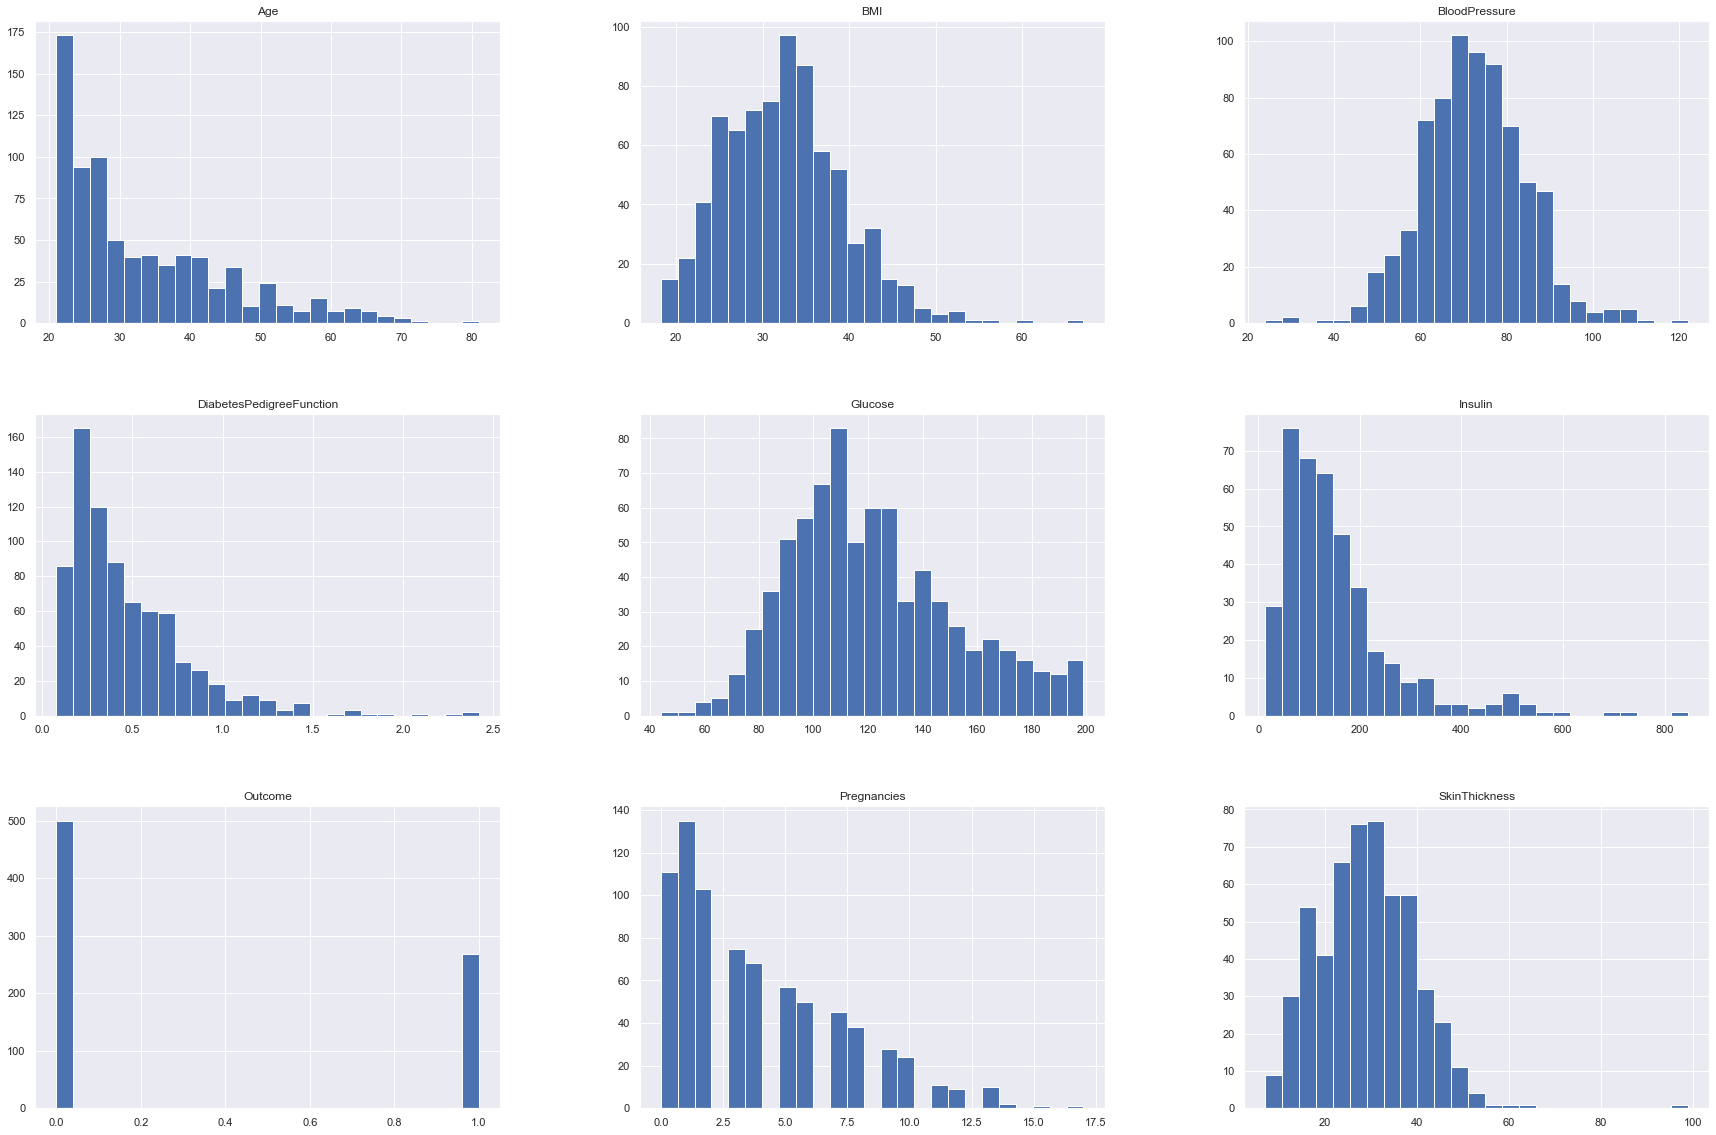

In [7]:
box=diabetes_data.hist(bins=25,figsize =(30,20))
plt.show()

#### Replace the zeros with mean and median values.

In [8]:
diabetes_data['Glucose'].fillna(diabetes_data['Glucose'].mean(), inplace = True)
diabetes_data['BloodPressure'].fillna(diabetes_data['BloodPressure'].mean(), inplace = True)
diabetes_data['SkinThickness'].fillna(diabetes_data['SkinThickness'].median(), inplace = True)
diabetes_data['Insulin'].fillna(diabetes_data['Insulin'].median(), inplace = True)
diabetes_data['BMI'].fillna(diabetes_data['BMI'].median(), inplace = True)

**<font color='teal'> Plot histograms of each column after replacing nan. </font>**

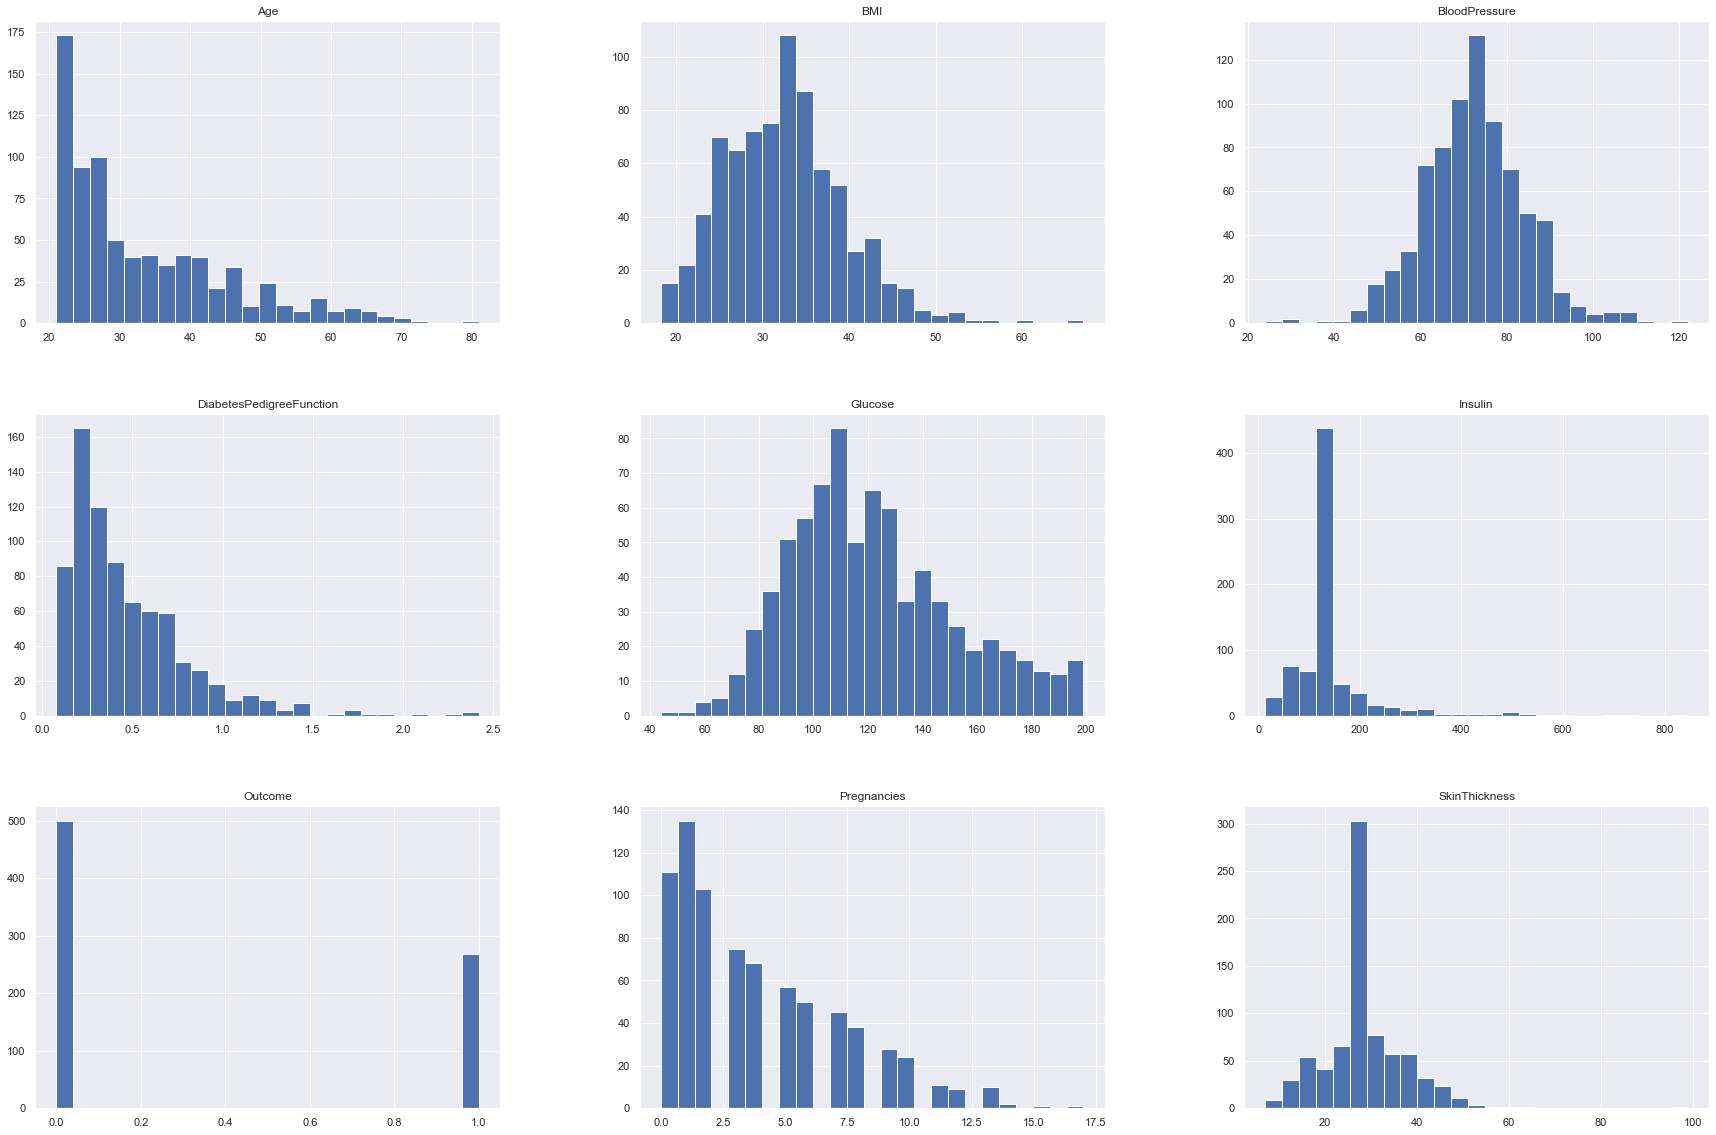

In [9]:
box=diabetes_data.hist(bins=25,figsize =(30,20))
plt.show()

#### Plot the correlation matrix heatmap

Correlation between various features


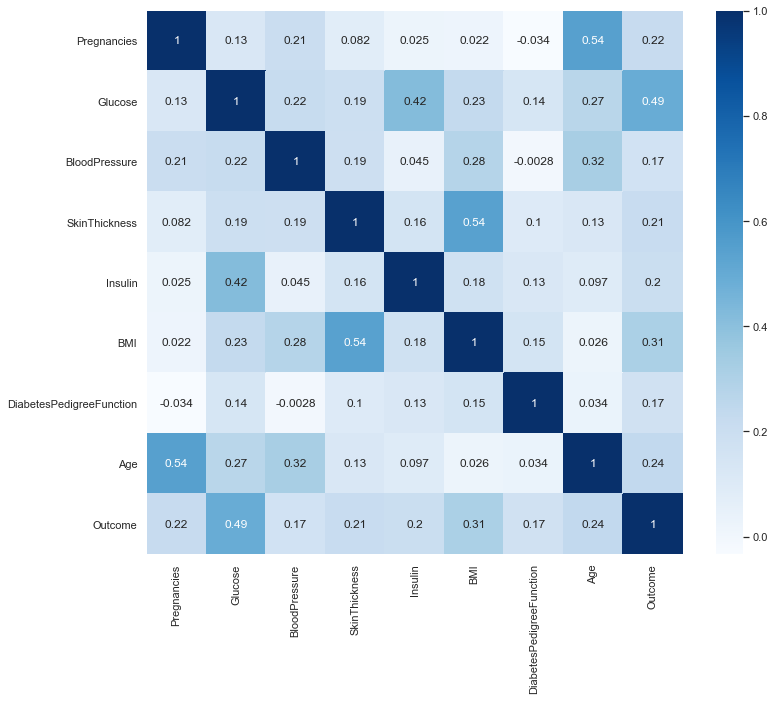

In [10]:
plt.figure(figsize=(12,10))
print('Correlation between various features')
p=sns.heatmap(diabetes_data.corr(), annot=True,cmap ='Blues')

**<font color='teal'> Using Sklearn, standarize the magnitude of the features by scaling the values. </font>**

In [11]:
# first we import the preprocessing package from the sklearn library
from sklearn import preprocessing

# Declare an explanatory variable, called X,and assign it the result of dropping 'Outcome' from the dataframe diabetes_data
X = diabetes_data.drop(['Outcome'], axis=1)

# Here we use the StandardScaler() method of the preprocessing package, and then call the fit() method
scaler = preprocessing.StandardScaler().fit(X)

# Declare a variable called X_scaled, and assign it the result of calling the transform() method with parameter X 
X_scaled=scaler.transform(X) 

**<font color='teal'> Define the `y` variable as the `Outcome` column.</font>**

In [12]:
y = diabetes_data['Outcome']

**<font color='teal'> Create a 70/30 train and test split. </font>**

In [13]:
# Import the train_test_split function from the sklearn.model_selection utility. 
from sklearn.model_selection import train_test_split

# Call the train_test_split() function with the first two parameters set to X_scaled and y 
# Declare four variables, X_train, X_test, y_train and y_test separated by commas
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y, test_size=0.30, random_state=1)

#### Using a range of neighbor values of 1-10, apply the KNearestNeighbor classifier to classify the the data.

In [14]:
from sklearn.neighbors import KNeighborsClassifier


test_scores = []
train_scores = []

for i in range(1,10):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

**<font color='teal'> Print the train and test scores for each iteration.</font>**

In [15]:
print("Train scores : ",train_scores)
print("Test scores : ",test_scores)

Train scores :  [1.0, 0.8305400372439479, 0.8230912476722533, 0.8044692737430168, 0.8100558659217877, 0.8007448789571695, 0.7951582867783985, 0.8026070763500931, 0.7951582867783985]
Test scores :  [0.7012987012987013, 0.7272727272727273, 0.7748917748917749, 0.7619047619047619, 0.7965367965367965, 0.7619047619047619, 0.7792207792207793, 0.7489177489177489, 0.7662337662337663]


**<font color='teal'> Identify the number of neighbors between 1-15 that resulted in the max score in the training dataset. </font>**

In [18]:
#import GridSearchCV
from sklearn.model_selection import GridSearchCV

#Assign the number of neighbours to the variable grid_params
grid_params = {"n_neighbors" : range(1,16)}

gs = GridSearchCV(KNeighborsClassifier(),grid_params)

#Fit the model to training data 
gs_results = gs.fit(X_train,y_train)

print(gs_results.best_score_)
print(gs_results.best_params_)

0.730079612322603
{'n_neighbors': 9}


**<font color='teal'> Identify the number of neighbors between 1-15 that resulted in the max score in the testing dataset. </font>**

In [19]:
#import GridSearchCV
from sklearn.model_selection import GridSearchCV

#Assign the number of neighbours to the variable grid_params
grid_params = {"n_neighbors" : range(1,16)}

gs = GridSearchCV(KNeighborsClassifier(),grid_params)

#Fit the model to training data 
gs_results = gs.fit(X_test,y_test)

print(gs_results.best_score_)
print(gs_results.best_params_)

0.7921369102682702
{'n_neighbors': 11}


Plot the train and test model performance by number of neighbors.

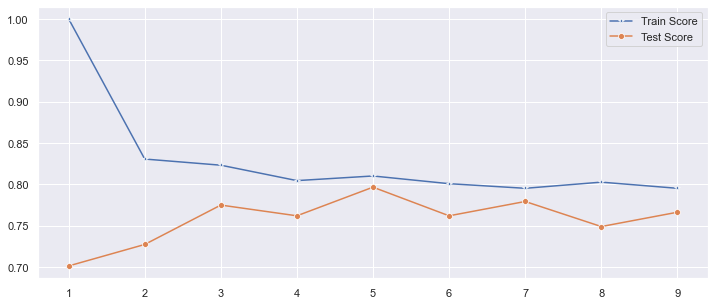

In [20]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,10),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,10),test_scores,marker='o',label='Test Score')

**<font color='teal'> Fit and score the best number of neighbors based on the plot. </font>**

In [21]:
# the elbow point is at n_neighbors = 2.
knn = KNeighborsClassifier(2)
knn.fit(X_train,y_train)
print("Train score :",knn.score(X_train,y_train))
print("Test score :",knn.score(X_test,y_test))

Train score : 0.8305400372439479
Test score : 0.7272727272727273


In [22]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
pl = confusion_matrix(y_test,y_pred)

**<font color='teal'> Plot the confusion matrix for the model fit above. </font>**

No handles with labels found to put in legend.


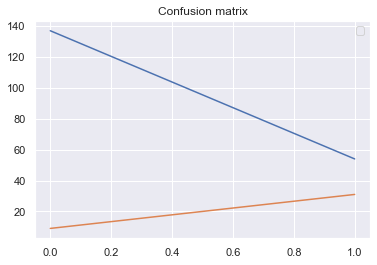

In [23]:
plt.plot(pl)
plt.title("Confusion matrix")
plt.legend()

**<font color='teal'> Print the classification report </font>**

In [24]:
#import CLassificationReport
from sklearn.metrics import classification_report

CR = classification_report(y_test,y_pred)
print(CR)

              precision    recall  f1-score   support

           0       0.72      0.94      0.81       146
           1       0.78      0.36      0.50        85

    accuracy                           0.73       231
   macro avg       0.75      0.65      0.65       231
weighted avg       0.74      0.73      0.70       231



#### In the case of the K nearest neighbors algorithm, the K parameter is one of the most important parameters affecting the model performance.  The model performance isn't horrible, but what if we didn't consider a wide enough range of values in our neighbors for the KNN? An alternative to fitting a loop of models is to use a grid search to identify the proper number. It is common practice to use a grid search method for all adjustable parameters in any type of machine learning algorithm. First, you define the grid — aka the range of values — to test in the parameter being optimized, and then compare the model outcome performance based on the different values in the grid.

#### Run the code in the next cell to see how to implement the grid search method for identifying the best parameter value for the n_neighbors parameter. Notice the param_grid is the range value to test and we apply cross validation with five folds to score each possible value of n_neighbors.

In [25]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

#### Print the best score and best parameter for n_neighbors.

In [26]:
print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.7526440879382056
Best Parameters: {'n_neighbors': 31}


Here you can see that the ideal number of n_neighbors for this model is 14 based on the grid search performed. 

Here the best n_neighbors is 31.

**<font color='teal'> Now, following the KNN example, apply this grid search method to find the optimal number of estimators in a Randon Forest model.
</font>**

In [27]:
#import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
param_grid = {'n_estimators': range(1,100)}

grid_search = GridSearchCV(rf, param_grid)
grid_search.fit(X_train, y_train)


GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n

In [28]:
print("best score :",grid_search.best_score_)
print(grid_search.best_params_)


best score : 0.25701625092171526
{'n_estimators': 95}
